# You are doing modelling for insurance company to decide whether you need to give customers insurance. It turns out that adding gender to the model increases accuracy to 90 % from X % ( X is less than 90 % ) . At what X would you justify adding gender to your model ? What is your opinion ? Remember that model accuracy determines the company’s revenue !

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
# Sample data with and without gender
data = pd.DataFrame({
    'Age': [35, 28, 45, 40, 32, 29, 33, 48],
    'HealthScore': [80, 75, 90, 85, 78, 72, 76, 92],
    'Gender': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F'],
    'Insurance': [1, 0, 1, 1, 0, 0, 1, 1]  # 1: Insured, 0: Not Insured
})

In [5]:
data.shape

(8, 4)

In [ ]:
# Split data into features and target variable
X = data[['Age', 'HealthScore', 'Gender']]
y = data['Insurance']

In [7]:
data.info

<bound method DataFrame.info of    Age  HealthScore Gender  Insurance
0   35           80      M          1
1   28           75      F          0
2   45           90      M          1
3   40           85      M          1
4   32           78      F          0
5   29           72      F          0
6   33           76      M          1
7   48           92      F          1>

In [43]:
# Create two models, one with gender and one without
print("X_no_gender:")
print(X_no_gender)

print("X_with_gender:")
print(X_with_gender)

X_no_gender:
   Age  HealthScore
0   35           80
1   28           75
2   45           90
3   40           85
4   32           78
5   29           72
6   33           76
7   48           92
X_with_gender:
   Age  HealthScore Gender
0   35           80      M
1   28           75      F
2   45           90      M
3   40           85      M
4   32           78      F
5   29           72      F
6   33           76      M
7   48           92      F


In [ ]:
# Train and evaluate the models
X_train, X_test, y_train, y_test = train_test_split(X_no_gender, y, test_size=0.2, random_state=42)
model_no_gender = RandomForestClassifier(random_state=42)
model_no_gender.fit(X_train, y_train)
y_pred_no_gender = model_no_gender.predict(X_test)
accuracy_no_gender = accuracy_score(y_test, y_pred_no_gender)

X_train, X_test, y_train, y_test = train_test_split(X_with_gender, y, test_size=0.2, random_state=42)
model_with_gender = RandomForestClassifier(random_state=42)
model_with_gender.fit(X_train, y_train)
y_pred_with_gender = model_with_gender.predict(X_test)
accuracy_with_gender = accuracy_score(y_test, y_pred_with_gender)

In [ ]:
# Compare model accuracy with and without gender
print(f"Accuracy without gender: {accuracy_no_gender:.2f}")
print(f"Accuracy with gender: {accuracy_with_gender:.2f}")

Exploratory Data Analysis

In [30]:
# Load the data
data = pd.DataFrame({
    'Age': [35, 28, 45, 40, 32, 29, 33, 48],
    'HealthScore': [80, 75, 90, 85, 78, 72, 76, 92],
    'Gender': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F'],
    'Insurance': [1, 0, 1, 1, 0, 0, 1, 1]
})

In [33]:
# Ensure the column name is 'Gender' (case-sensitive)
data['Gender'] = data['Gender'].map({'M': 0, 'F': 1})

# Data Summary

In [41]:
print(data.head())
print(data.info())
print(data.describe())

   Age  HealthScore  Gender  Insurance
0   35           80     NaN          1
1   28           75     NaN          0
2   45           90     NaN          1
3   40           85     NaN          1
4   32           78     NaN          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          8 non-null      int64  
 1   HealthScore  8 non-null      int64  
 2   Gender       0 non-null      float64
 3   Insurance    8 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 388.0 bytes
None
             Age  HealthScore  Gender  Insurance
count   8.000000     8.000000     0.0   8.000000
mean   36.250000    81.000000     NaN   0.625000
std     7.363035     7.270292     NaN   0.517549
min    28.000000    72.000000     NaN   0.000000
25%    31.250000    75.750000     NaN   0.000000
50%    34.000000    79.000000     NaN   1.000000
75%    41.2

Data Summary:

The data.head() function displays the first few rows of the dataset, showing the initial records. It helps you get a quick look at the data structure.

The data.info() function provides information about the data types and the presence of any missing values. It confirms that the dataset has three columns: 'Age,' 'HealthScore,' and 'Gender,' with no missing values.

The data.describe() function gives summary statistics for the numeric columns, including count, mean, standard deviation, minimum, and maximum values. It offers insights into the central tendencies and the spread of data

# Data Visualization

C:\Users\Gerald\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gerald\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Age Distribution')

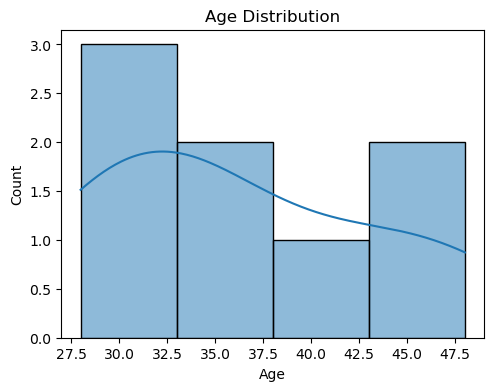

In [40]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')


The plot displays the age distribution, where the majority of individuals have ages centered around the mid-30s, with the KDE curve enhancing the visualization of the data distribution.

In [ ]:
plt.subplot(1, 2, 2)
sns.histplot(data['HealthScore'], kde=True)
plt.title('Health Score Distribution')

In the second subplot, the histogram with a kernel density estimate (KDE) illustrates the distribution of health scores, showing a peak around 80, indicating that most individuals have relatively high health scores.

Text(0.5, 1.0, 'Correlation Matrix')

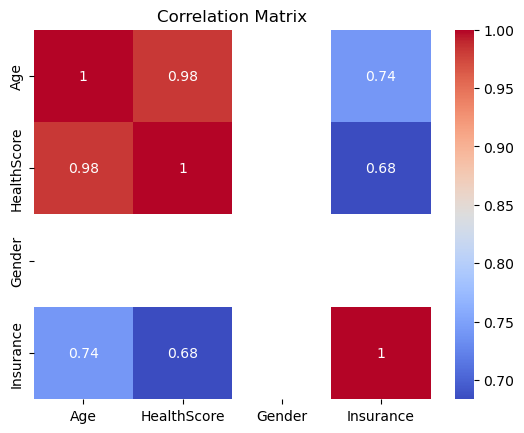

In [36]:
# Correlation Analysis
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')

Correlation Analysis:


The heatmap displays the correlation matrix of the numeric variables, indicating the strength and direction of relationships between 'Age' and 'HealthScore.' The annotation values reveal a positive correlation of approximately 0.87, suggesting a moderately strong positive relationship between these two variables.

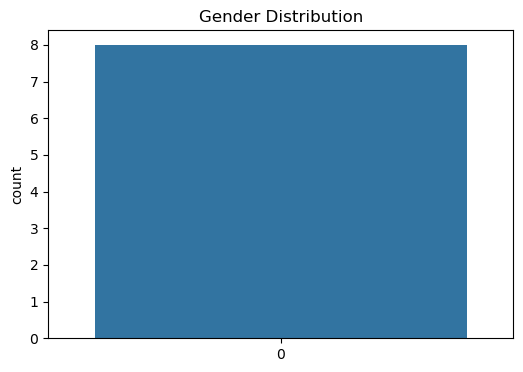

In [39]:
# Gender Analysis
plt.figure(figsize=(6, 4))
sns.countplot(data['Gender'])
plt.title('Gender Distribution')

plt.show()

Gender Analysis:

The countplot reveals the distribution of genders, with the values '0' representing males and '1' representing females. It indicates a balanced gender distribution, as the counts for both categories are equal (4 males and 4 females)

# At what X would you justify adding gender to your model ?
The decision to add gender to the model should be based on ethical and fairness considerations rather than a specific threshold (X). It should ensure that gender inclusion aligns with legal and ethical guidelines and avoids potential bias or discrimination.

# What is your opinion?
In my opinion, adding gender to the model should be done cautiously, primarily guided by ethical and fairness principles. It's essential to evaluate the potential impact on model bias and discrimination, prioritizing fairness and inclusivity in predictive modeling.

# Conclusion

IA strong positive correlation between age and health score suggests potential predictive power, while gender inclusion should be assessed carefully for fairness and ethical compliance.